In [47]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as s

### A.1) Calcul de la FFT d'un signal tronqué 

Sans fenêtre (fenêtre tacite rectangulaire), les résultats sont passablement éparpillés.
- Essayer des valeurs de r1 entière et comparer
- Afficher ou non la FFT du signal combiné (ligne en commentaire)

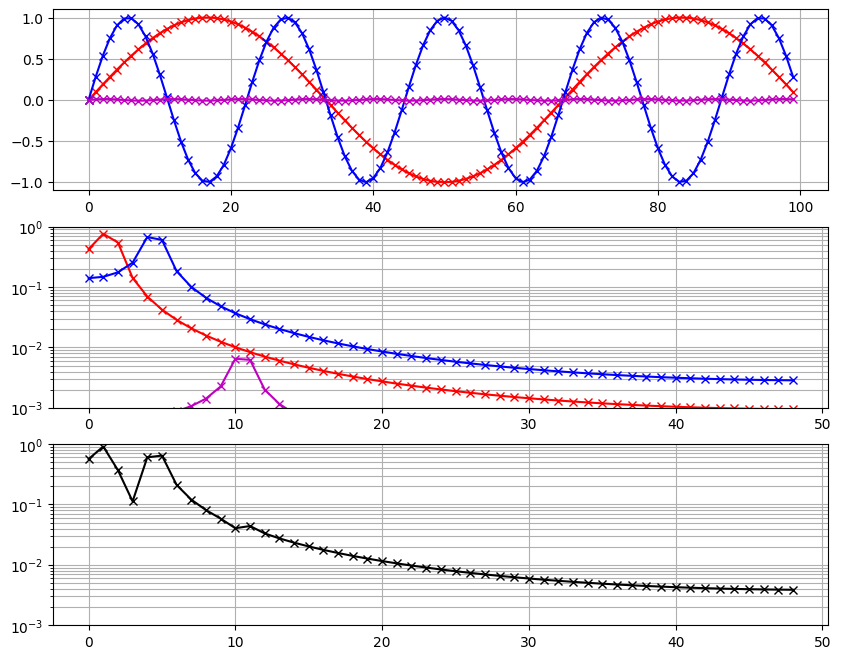

In [68]:
N=100
n=np.arange(N)

r1=1.5 # Valeur entière
r2=4.5
r3=10.5
g1=1;g2=1;g3=1 #  ===== essayez g3=0.01 et trouvez la bonne fenêtre

ssin1=np.sin(r1*n*2*np.pi/N)*g1
ssin2=np.sin(r2*n*2*np.pi/N)*g2
ssin3=np.sin(r3*n*2*np.pi/N)*g3
ssin4=(ssin1+ssin2+ssin3)
fftsin1=np.abs(np.fft.fft(ssin1)[0:N//2-1])*2/N
fftsin2=np.abs(np.fft.fft(ssin2)[0:N//2-1])*2/N
fftsin3=np.abs(np.fft.fft(ssin3)[0:N//2-1])*2/N
fftsin4=np.abs(np.fft.fft(ssin4)[0:N//2-1])*2/N

fig, ax = plt.subplots(3,1,figsize=(10,8))
ax[0].plot(ssin1,'r-x')
ax[0].plot(ssin2,'b-x')
ax[0].plot(ssin3,'m-x')
ax[1].semilogy(fftsin1,'r-x')
ax[1].semilogy(fftsin2,'b-x')
ax[1].semilogy(fftsin3,'m-x')
ax[2].semilogy(fftsin4,'k-x') # Comparez avec et sans la FFT du signal combiné

ax[0].grid(True, which='both')
ax[1].grid(True, which='both')
ax[1].set_ylim([0.001,1])
ax[2].grid(True, which='both')
ax[2].set_ylim([0.001,1])
plt.show()

Si on utilise une fenêtre, on peut amortir l'effet. Ici on utilise une fenêtre de Hanning ou flattop.

- Tester et comparer l'effet des 2 fenêtres

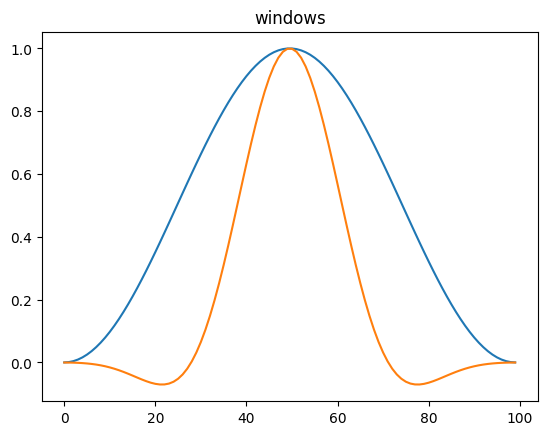

In [77]:
# Création des fenêtres
w1 = np.hanning(N)
w2 = s.windows.flattop(N)
plt.plot(w1)
plt.plot(w2)
plt.title("windows")

# Ajustement du gain
gw1=N/np.sum(w1)
gw2=N/np.sum(w2)
w1=w1*gw1
w2=w2*gw2

#Choix de la fenêtre
w=w1

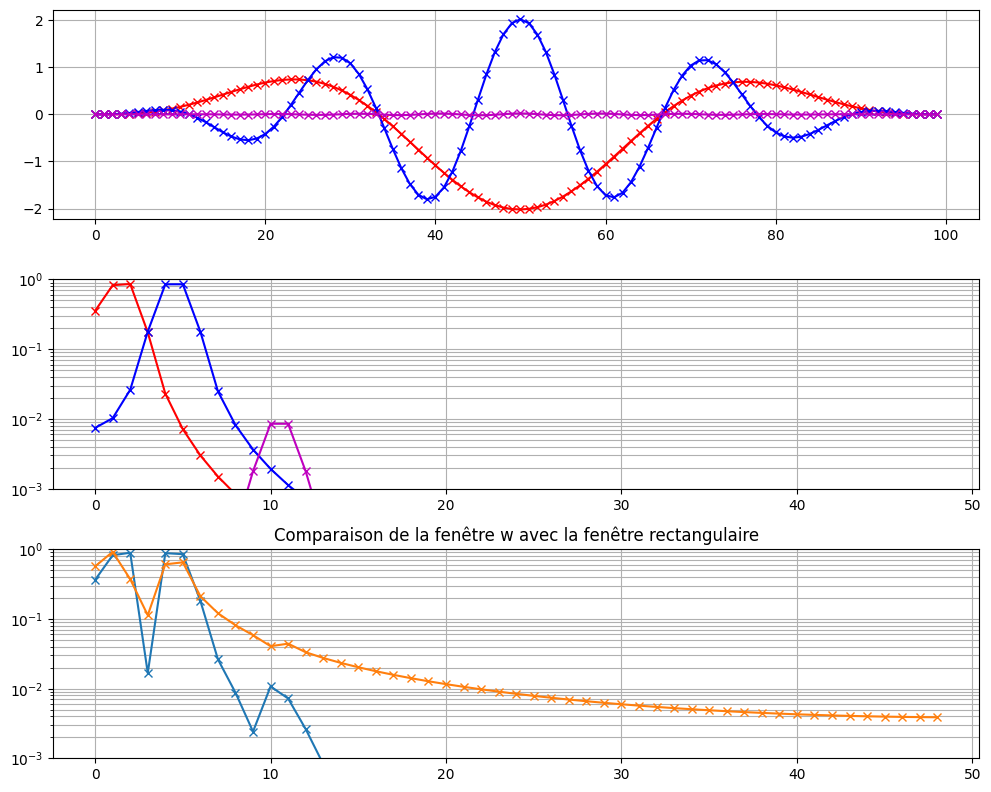

In [78]:

# multiplication par la fenêtre et calcul de la FFT
fftsin1w=np.abs(np.fft.fft(ssin1*w)[0:N//2-1])*2/N
fftsin2w=np.abs(np.fft.fft(ssin2*w)[0:N//2-1])*2/N
fftsin3w=np.abs(np.fft.fft(ssin3*w)[0:N//2-1])*2/N

fftsin4w=np.abs(np.fft.fft(ssin4*w)[0:N//2-1])*2/N

fig, ax = plt.subplots(3,1,figsize=(10,8))
ax[0].plot(ssin1*w,'r-x')
ax[0].plot(ssin2*w,'b-x')
ax[0].plot(ssin3*w,'m-x')
ax[1].semilogy(fftsin1w,'r-x')
ax[1].semilogy(fftsin2w,'b-x')
ax[1].semilogy(fftsin3w,'m-x')
ax[2].semilogy(fftsin4w,'-x') # Comparez avec et sans la FFT du signal combiné
ax[2].semilogy(fftsin4,'-x') # Comparez avec et sans la FFT du signal combiné

ax[0].grid(True, which='both')
ax[1].grid(True, which='both')
ax[2].grid(True, which='both')
ax[1].set_ylim([0.001,1])
ax[2].set_ylim([0.001,1])
ax[2].set_title("Comparaison de la fenêtre w avec la fenêtre rectangulaire")
fig.tight_layout(pad=1.0)
plt.show()

### B) Calcul de la TFD continue

On définit une fonction qui permet de calculer la TFD avec une variable fréquence continue.
- On trace la TFD d'une fenêtre rectangulaire
- On trace la TFD d'une fenêtre de Hanning

In [14]:
# Définition de la TFD continue
def calcTFD(x,f):
    N=len(x)
    S=0
    for i in range(N):
        S += x[i]*np.exp(-1j*2*np.pi*f*i/N)
    return S
            

In [62]:
# On calcule la TFD pour 2 fenêtres
N=32
x1=np.ones(N)
x2=np.hanning(N)
x3=s.windows.flattop(N)
gw2=N/np.sum(x2)
gw3=N/np.sum(x3)
rf=np.arange(0,N,0.1)
tX1=np.zeros(len(rf), dtype='complex')
tX2=np.zeros(len(rf), dtype='complex')
tx3=np.zeros(len(rf), dtype='complex')
index=0
for f in rf:
    tX1[index]=calcTFD(x1,f)
    tX2[index]=calcTFD(x2,f)
    tX3[index]=calcTFD(x3,f)
    index+=1

tX1=np.fft.fftshift(tX1)*2/N
tX2=np.fft.fftshift(tX2)*2/N*gw2
tX3=np.fft.fftshift(tX3)*2/N*gw3

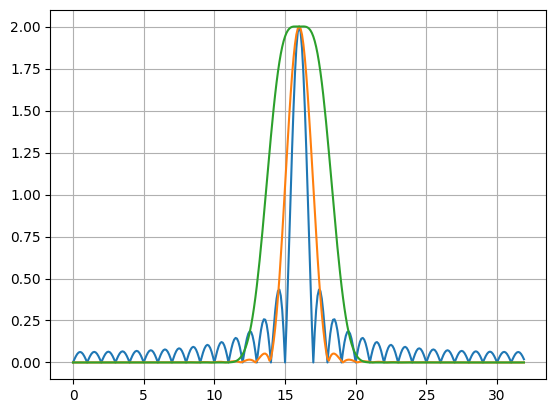

In [63]:
zm=range(len(rf))
plt.plot(rf[zm], np.abs(tX1[zm]))
plt.plot(rf[zm], np.abs(tX2[zm]))
plt.plot(rf[zm], np.abs(tX3[zm]))
plt.grid()

On peut remarquer 
- la largeur plus importante de la fenêtre de Hanning
- Ses lobes secondaires plus petits
- Le plateau de la fenêtre Flat Top

### C) Visualisation de l'effet des fenêtres

**NOTE** Le fait d'augmenter la résolution de la FFT en ajoutant des 0 n'est pas très intuitif. Préférer la section C) pour commencer.

Une façon de voir l'effet des fenêtre consiste à augmenter le nombre de points de l'échantillon en ajoutant Nx des 0. Ceci augmente la résolution fréquencielle de la FFT.

1. On génère un signal sinusoïdal avec un nombre de périodes entier. Sa FFT est une raie.
2. On génère un signal rectangulaire actif au début de l'échantillon seulement. Sa longeur n'est pas un multiple du nombre de périodes du signal
3. On génère un signal fenêtré qui est le produit du signal 1. et de la fenêtre 2.
4. On calcule la FFT des différents signaux.
5. On superpose la FFT du signal calculée sur les échantillons correspondant à la fenêtre.

Les valeurs de la FFT avec moins de points se superposent à la FFT du signal fenêtré.

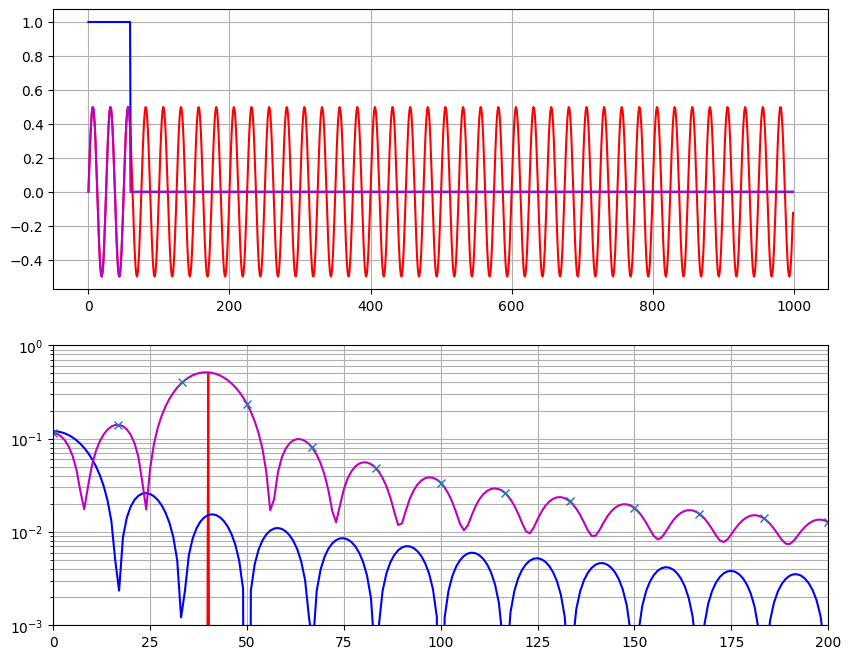

In [220]:
A=1000

N=60 # window
n=np.arange(A)

# Paramètres du signal
r1=40
r2=45
g1=0.5
g2=0

# Signal et fenêtre
ssin1=g1*np.sin(r1*n*2*np.pi/A)+g2*np.sin(r2*n*2*np.pi/A)
rect1 =np.zeros(A)
rect1[0:N]=np.ones(N)

# Signal fenêtré
wsin1=ssin1*rect1

# Signal de longueur courte
wsinL=wsin1[0:N]
rsinL=np.arange(N)*A/N # on génère un index pour l'aligner sur les autres courbes

# Calcul des FFT
fftsin1=np.abs(np.fft.fft(ssin1)[0:A//2-1])*2/A
fftrect1=np.abs(np.fft.fft(rect1)[0:A//2-1])*2/A
fftwsin1=np.abs(np.fft.fft(wsin1)[0:A//2-1])*2/N
fftwsinL=np.abs(np.fft.fft(wsinL))*2/N

fig, ax = plt.subplots(2,1,figsize=(10,8))
ax[0].plot(ssin1,'r-')
ax[0].plot(rect1,'b-')
ax[0].plot(wsin1,'m-')
#ax[0].plot(ssin3,'m-x')
ax[1].semilogy(fftsin1,'r-')
ax[1].semilogy(fftrect1,'b-')
ax[1].semilogy(fftwsin1,'m-')
ax[1].semilogy(rsinL,fftwsinL,'x')

ax[0].grid(True, which='both')
ax[1].grid(True, which='both')
ax[1].set_ylim([0.001,1])
ax[1].set_xlim([0,200])
plt.show()


### TFD continue appliquée à des signaux

De façon similaire à la rubrique précédente, on génère 2 signaux de différentes fréquences. Pour ces 2 signaux, on calcule une TFD continue. Pour le premier signal, on calcule encore une FFT.

- On commence avec des fréquences entières.
- On change ensuite les fréquences vers des valeurs fractionnaires
    - Ceci ne change pas grand chose pour la TFD continue
    - La FFT est passablement affectée car les points à fréquence entière n'arrivent plus sur les points bas du peigne. 

In [17]:
# calcul sur un signal discret
N=64
df=0.02
n=np.arange(N)

f1=5.2 # Changer f1 pour une valeur fractionnaire (5.5)
f2=10.5
x1=np.sin(2*np.pi*n*f1/N)
x2=np.sin(2*np.pi*n*f2/N)
rf=np.arange(0,N,df)
tX1=np.zeros(len(rf), dtype='complex')
tX2=np.zeros(len(rf), dtype='complex')
index=0
for f in rf:
    tX1[index]=calcTFD(x1,f)
    tX2[index]=calcTFD(x2,f)
    index+=1
tX1=np.fft.fftshift(tX1)*2/N
tX2=np.fft.fftshift(tX2)*2/N
X1_fft=np.fft.fftshift(np.abs(np.fft.fft(x1)))*2/N

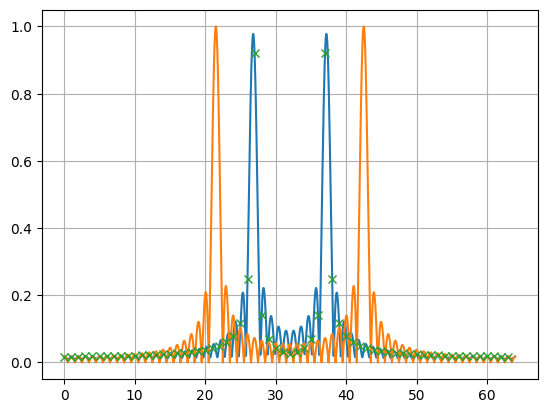

In [18]:
zm=range(len(rf))
plt.plot(rf[zm], np.abs(tX1[zm]))
plt.plot(rf[zm], np.abs(tX2[zm]))
plt.plot(X1_fft,'x')
#plt.xlim([10,30]) # Possibilité de zoomer sur la figure
plt.grid()

### D) Comparaison de l'effet du fenêtrage

On génère un signal avec 2 composantes sinusoïdales et on compare l'effet du fenêtrage.

- On commence avec f1 et f2 entiers. Dans ce cas le résultat est précis, plus précis avec la fenêtre rectangulaire
- On modifie f1 et f2 pour avoir des nombres fractionnaires (12.5, 16.5 par exemple). Dans ce cas le résultat est plus précis avec la fenêtre de Hamming. En particulier en dehors des zones avec un *raie*,

In [230]:
# On définit un signal composé de 2 sinus d'amplitude 1
N=100
n=np.arange(N)
f1=12.5
f2=16.5
xlong=np.sin(2*np.pi*f1*n/N)+np.sin(2*np.pi*f2*n/N)

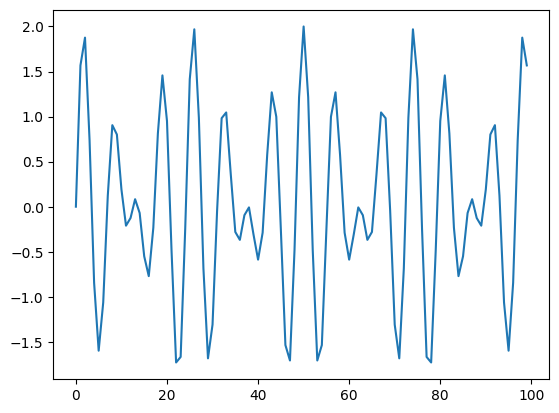

In [231]:
plt.plot(xlong)

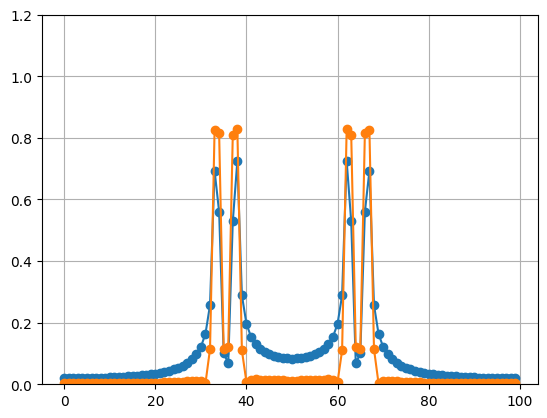

In [232]:
xlong_fft=np.abs(np.fft.fft(xlong))*2/N
w=np.hamming(N)
gw=N/np.sum(w)
xlong_fftw=np.abs(np.fft.fft(xlong*w))*2/N*gw

xlong_fft=np.fft.fftshift(xlong_fft)
xlong_fftw=np.fft.fftshift(xlong_fftw)

r=np.arange(N)
plt.plot(xlong_fft[r],'-o')
plt.plot(xlong_fftw[r],'-o')
plt.ylim([0, 1.2])
plt.grid()

In [233]:
# Recherche du maximum trouvé pour les 2 fenêtres.
[np.max(xlong_fft), np.max(xlong_fftw)]

[0.7251617841175224, 0.8295544025466152]

Les 2 fonctions trouvent la même amplitude qui est correcte dans le cas où les fréquences sont entières.

### E) Convolution, qu'est-ce ?

La convolution est définie comme suit, pour 2 signaux x et y :

$$
c(t) = (x * y)(t) = \int_{-\infty}^{+\infty}{x(\tau)\cdot y(t-\tau) d\tau}
$$

Dans le cas particulier où $y(t)$ est la fonction $\delta(t-t0)$, on va retrouver comme résultat $(x * \delta)(t)=x(t-t0)$.

Dans l'exemple ci-dessous, on calcule une convolution entre une fonction $sinc()$ et un échantillon qui n'a que 1 ou 2 points non nuls.

- On observe que ceci revient à superposer le signal $sinc()$ aux endroits où les échantillons sont non nuls.

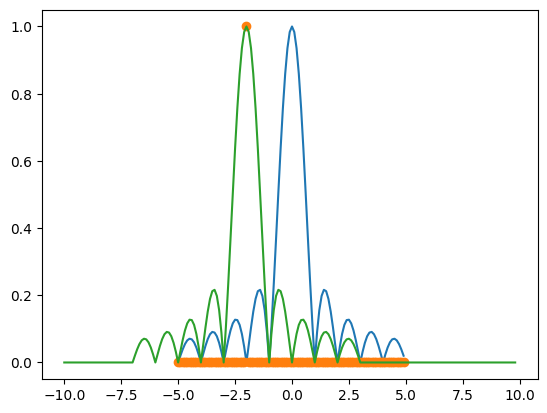

In [235]:
t=np.arange(-5,5,0.1)
x=np.abs(np.sinc(t))

# Définition du tableau y, seulement quelques points non nuls
y=np.zeros(len(t))
y[30]=1
y[60]=0

c=np.convolve(x,y)
t2=np.arange(-10,10,0.1)

plt.plot(t,x)
plt.plot(t,y,'o')
plt.plot(t2[0:-1],c)
plt.grid()